### 전처리

In [3]:
import numpy as np

print(pd.__version__)

2.2.2


In [2]:
import pandas as pd
import numpy as np


dgb_df = pd.read_csv('preprocessed_data\DGB_preprecess_expense_05.CSV')
dgb_df.head()

,datetime,account,amount,target,memo,target_type,special_budget
0,2024-04-07 23:59:08,BC,-5000,주식회사 레진엔,,소비,0
1,2024-04-07 19:56:24,BC,-14000,구글페이먼트코리,,소비,0
2,2024-04-06 13:43:17,BC,-15000,주식회사 애니플,,소비,0
3,2024-04-06 13:23:01,BC,-33500,주식회사 애니플,,소비,0
4,2024-04-03 12:33:57,대체,-180428,SP HOLOLIVE PROD,,소비,0


In [3]:
ibk_df = pd.read_csv('preprocessed_data\IBK_output_05.CSV')
ibk_df.head()

,datetime,account,amount,target,memo,target_type,special_budget
0,2024-04-03 23:41:42,체크,-4990.0,구글페이먼트코리아,,소비,0
1,2024-04-02 16:28:13,체크,-4990.0,구글페이먼트코리아,,소비,0
2,2024-04-01 20:10:32,체크,-3990.0,구글페이먼트코리아,,소비,0
3,2024-03-23 09:10:45,체크,-9900.0,㈜라프텔,,소비,0
4,2024-03-03 23:41:42,체크,-4990.0,구글페이먼트코리아,,소비,0


In [4]:
input_all_df = pd.concat([dgb_df, ibk_df], axis=0, ignore_index=True)
input_all_df.head()

,datetime,account,amount,target,memo,target_type,special_budget
0,2024-04-07 23:59:08,BC,-5000.0,주식회사 레진엔,,소비,0
1,2024-04-07 19:56:24,BC,-14000.0,구글페이먼트코리,,소비,0
2,2024-04-06 13:43:17,BC,-15000.0,주식회사 애니플,,소비,0
3,2024-04-06 13:23:01,BC,-33500.0,주식회사 애니플,,소비,0
4,2024-04-03 12:33:57,대체,-180428.0,SP HOLOLIVE PROD,,소비,0


In [5]:
input_all_df['datetime'] = pd.to_datetime(input_all_df['datetime'])
input_all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023 entries, 0 to 2022
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   datetime        2023 non-null   datetime64[ns]
 1   account         2023 non-null   object        
 2   amount          2023 non-null   float64       
 3   target          2023 non-null   object        
 4   memo            2023 non-null   object        
 5   target_type     2023 non-null   object        
 6   special_budget  2023 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 110.8+ KB


In [6]:
expense_monthly = input_all_df[input_all_df['special_budget'] == 0].groupby([input_all_df['datetime'].dt.year.rename('year'), input_all_df['datetime'].dt.month.rename('month')])['amount'].sum()
display(expense_monthly.tail(36))

year  month
2021  5        -99500.0
      6       -223900.0
      7       -268850.0
      8       -128700.0
      9       -167520.0
      10      -231748.0
      11      -285076.0
      12      -579659.0
2022  1       -257196.0
      2       -280319.0
      3       -407011.0
      4       -396916.0
      5       -271139.0
      6       -140746.0
      7       -628946.0
      8       -303933.0
      9       -307777.0
      10      -242175.0
      11      -223049.0
      12      -157886.0
2023  1       -243192.0
      2       -267499.0
      3       -161275.0
      4       -288443.0
      5       -341719.0
      6       -312079.0
      7       -357480.0
      8       -239775.0
      9       -167431.0
      10      -292562.0
      11      -283536.0
      12      -558427.0
2024  1       -778968.0
      2       -620743.0
      3       -794813.0
      4       -293776.0
Name: amount, dtype: float64

In [7]:
expense_monthly_df = expense_monthly.reset_index().copy()
expense_monthly_df.head()

,year,month,amount
0,2015,12,-44150.0
1,2016,1,-49400.0
2,2016,2,-20000.0
3,2016,3,-387460.0
4,2016,4,-278629.0


In [8]:
expense_yearly = input_all_df[input_all_df['special_budget'] == 0].groupby(input_all_df['datetime'].dt.year.rename('year'))['amount'].sum()
expense_yearly

year
2015     -44150.0
2016   -2369805.0
2017   -3653395.0
2018   -3480785.0
2019   -3247011.0
2020   -2217709.0
2021   -2505677.0
2022   -3617093.0
2023   -3513418.0
2024   -2488300.0
Name: amount, dtype: float64

In [9]:
expense_yearly_df = expense_yearly.reset_index().copy()
expense_yearly_df

,year,amount
0,2015,-44150.0
1,2016,-2369805.0
2,2017,-3653395.0
3,2018,-3480785.0
4,2019,-3247011.0
5,2020,-2217709.0
6,2021,-2505677.0
7,2022,-3617093.0
8,2023,-3513418.0
9,2024,-2488300.0


In [10]:
input_df = pd.read_csv('preprocessed_data\DGB_preprecess_inputs_drop_self_add_category.CSV')
display(input_df.head())
input_df['datetime'] = pd.to_datetime(input_df['datetime'])
input_df.info()

,type,target,memo,income,datetime,target_type
0,CD공동,효성0938C89,,150000,2024-03-26 17:36:55,수입
1,자동이체,비씨대금환급,,500,2024-03-25 03:02:47,수입
2,예금이자,예금이자,,24,2024-03-24 06:20:30,수입
3,모바일,카뱅우윤희,,55000,2024-03-20 16:45:36,수입
4,모바일,카뱅우윤희,,100000,2024-03-10 15:35:58,수입


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   type         237 non-null    object        
 1   target       237 non-null    object        
 2   memo         237 non-null    object        
 3   income       237 non-null    int64         
 4   datetime     237 non-null    datetime64[ns]
 5   target_type  237 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 11.2+ KB


In [11]:
income_monthly = input_df.groupby([input_df['datetime'].dt.year.rename('year'), input_df['datetime'].dt.month.rename('month')])['income'].sum()
income_yearly = input_df.groupby(input_df['datetime'].dt.year.rename('year'))['income'].sum()
income_yearly

year
2015     210004
2016    2973864
2017    3826817
2018    3751344
2019    3500149
2020    3000798
2021    1315210
2022    7992528
2023    6525989
2024    1611072
Name: income, dtype: int64

In [12]:
income_monthly_df = income_monthly.reset_index().copy()
income_yearly_df = income_yearly.reset_index().copy()

In [13]:
years  = input_all_df['datetime'].dt.year.unique()
years.sort()
all_year_months = [(year, month) for year in years for month in range(1, 13)]
all_year_month_df = pd.DataFrame(all_year_months, columns=['year', 'month'])
all_year_month_df

,year,month
0,2015,1
1,2015,2
2,2015,3
3,2015,4
4,2015,5
...,...,...
115,2024,8
116,2024,9
117,2024,10
118,2024,11


In [14]:
merged_data = all_year_month_df.merge(expense_monthly_df, on=['year', 'month'], how='left')
merged_data.head(5)

,year,month,amount
0,2015,1,NaN
1,2015,2,NaN
2,2015,3,NaN
3,2015,4,NaN
4,2015,5,NaN


In [15]:
merged_data = merged_data.merge(income_monthly_df, on=['year', 'month'], how='left')
merged_data

,year,month,amount,income
0,2015,1,NaN,NaN
1,2015,2,NaN,NaN
2,2015,3,NaN,NaN
3,2015,4,NaN,NaN
4,2015,5,NaN,NaN
...,...,...,...,...
115,2024,8,NaN,NaN
116,2024,9,NaN,NaN
117,2024,10,NaN,NaN
118,2024,11,NaN,NaN


In [16]:
# merged_data = merged_data.merge(income_yearly_df, on='year', how='left', suffixes=('', '_yearly'))
# merged_data.head()

In [17]:
merged_data_copy = merged_data.copy()
merged_data_copy = merged_data_copy.drop(index=list(range(0, 11)) + list(range(111, len(merged_data))))
merged_data_copy = merged_data_copy.fillna(0)
merged_data_copy['past_income'] = merged_data_copy['income'].shift(1)
merged_data_copy['past_expense'] = merged_data_copy['amount'].shift(1)
# merged_data_copy['past_yearly_income'] = merged_data_copy['income_yearly'].shift(12, fill_value = 210004.0)
merged_data_copy['stacked_income'] = merged_data_copy['income'].cumsum()
merged_data_copy['stacked_expense'] = merged_data_copy['amount'].cumsum()
merged_data_copy['stacked_asset'] = merged_data_copy['stacked_income'] + merged_data_copy['stacked_expense']
merged_data_copy['last_stacked_asset'] = merged_data_copy['stacked_asset'].shift(1)
merged_data_copy = merged_data_copy.fillna(0)
merged_data_copy = merged_data_copy.drop(columns=['stacked_income','stacked_expense','stacked_asset'])
display(merged_data_copy.head(10))

,year,month,amount,income,past_income,past_expense,last_stacked_asset
11,2015,12,-44150.0,210004.0,0.0,0.0,0.0
12,2016,1,-49400.0,320000.0,210004.0,-44150.0,165854.0
13,2016,2,-20000.0,272000.0,320000.0,-49400.0,436454.0
14,2016,3,-387460.0,212105.0,272000.0,-20000.0,688454.0
15,2016,4,-278629.0,250000.0,212105.0,-387460.0,513099.0
16,2016,5,-284983.0,315000.0,250000.0,-278629.0,484470.0
17,2016,6,-170722.0,200121.0,315000.0,-284983.0,514487.0
18,2016,7,-231907.0,200000.0,200121.0,-170722.0,543886.0
19,2016,8,-136700.0,150000.0,200000.0,-231907.0,511979.0
20,2016,9,-221908.0,410062.0,150000.0,-136700.0,525279.0


In [18]:
merged_data_copy.to_csv('train_data\preprocessed_data_02.CSV', index = False)

### 데이터 분리

In [19]:
import pandas as pd

pd.__version__

'1.5.3'

In [20]:

from sklearn.model_selection import train_test_split

data_df = pd.read_csv('train_data\preprocessed_data_02.CSV')
# data_df = data_df.abs()

target = 'amount'
x = data_df.drop(target, axis = 1)
y = data_df.loc[:, target]

# train_data, test_data = train_test_split(data_df, test_size = .3, shuffle=False)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, shuffle=False)

In [21]:
data_df.columns

Index(['year', 'month', 'amount', 'income', 'past_income', 'past_expense',
       'last_stacked_asset'],
      dtype='object')

In [22]:
import tensorflow as tf

tf.__version__

'2.16.1'

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

tf.keras.backend.clear_session()
tf.compat.v1.reset_default_graph()

input_layer = keras.layers.Input(shape=(6,))
a_layer = keras.layers.Dense(16, activation='relu')(input_layer)
a_layer = keras.layers.Dense(32, activation='relu')(a_layer)
output_layer = keras.layers.Dense(1)(a_layer)

model = keras.models.Model(inputs=input_layer, outputs=output_layer)


model.compile(loss = 'mean_absolute_error', optimizer = 'adam', metrics=[keras.metrics.MeanAbsolutePercentageError()])

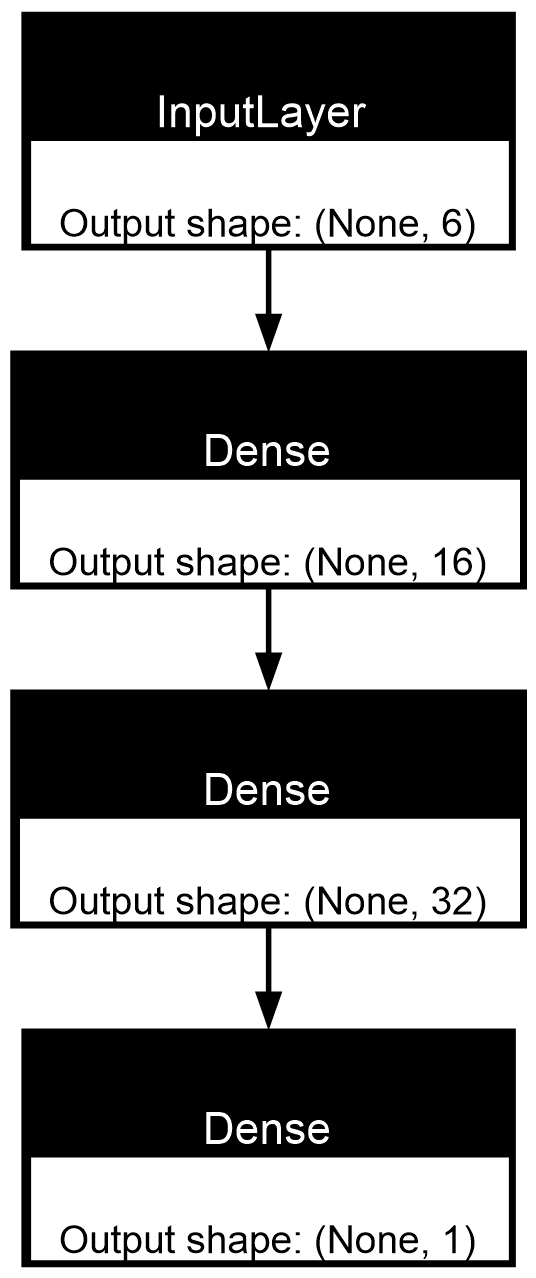

In [5]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)


In [6]:
 history = model.fit(x, y, epochs=30, verbose=1)

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 200778.7188 - mean_absolute_percentage_error: 72.8484  
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 172038.8281 - mean_absolute_percentage_error: 66.2688 
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 166287.0781 - mean_absolute_percentage_error: 65.0294 
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 170401.6719 - mean_absolute_percentage_error: 62.2743 
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 145766.2344 - mean_absolute_percentage_error: 54.9003 
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 146146.5938 - mean_absolute_percentage_error: 53.5234 
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 146582.4688 - mean_absolute_percentage_error: 54.0444 
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 137704.8125 - mean_absolute_percentage_error: 55.3316 
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 127653.7969 - mean_absolute_percentage_error: 54.5549 


In [7]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,069 (8.09 KB)

 Trainable params: 689 (2.69 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,380 (5.39 KB)

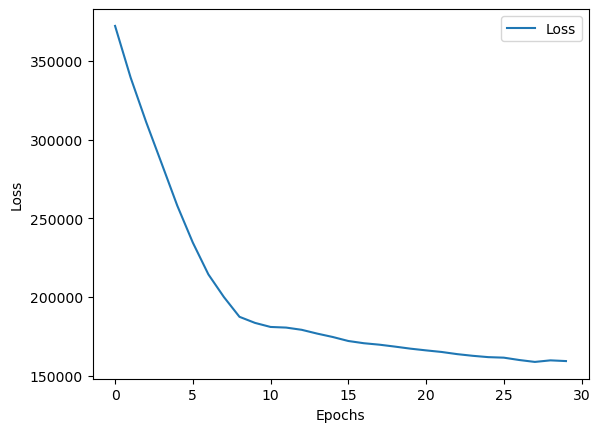

In [46]:
# 학습 과정 시각화
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [47]:
y_pred = model.predict(test_x)

print("Predictions:", y_pred.flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predictions: [-113687.24   -68069.34  -131294.3    -58781.3    -50021.676  -39044.98
  -13158.73  -243980.48  -143973.28  -602344.3   -321280.6   -315827.6
 -277362.38  -301362.88  -264821.62  -376979.62  -417334.62  -326710.12
 -292677.7   -328259.8   -287758.5   -325571.    -277274.47  -327313.25
 -549011.06  -714494.9   -478809.8   -485381.3   -461514.84  -414635.7  ]


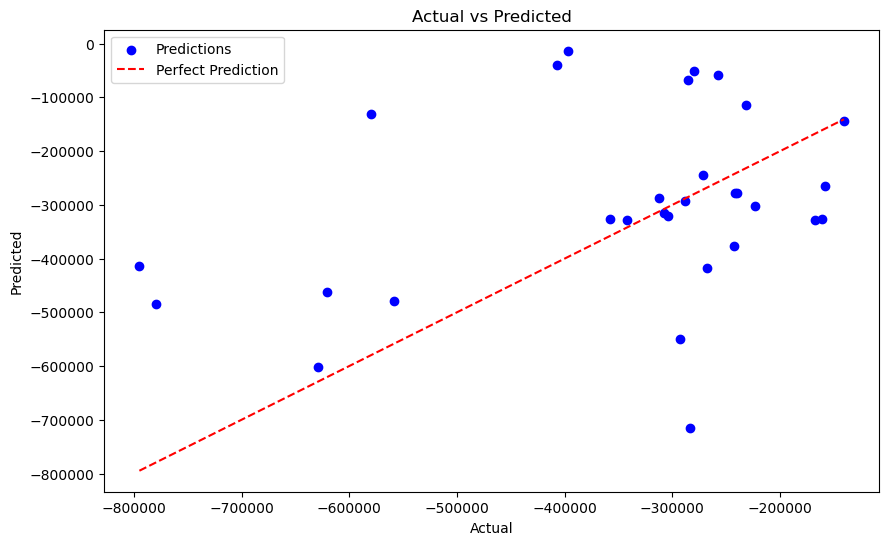

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(test_y, y_pred, color='blue', label='Predictions')
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], '--', color='red', label='Perfect Prediction')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

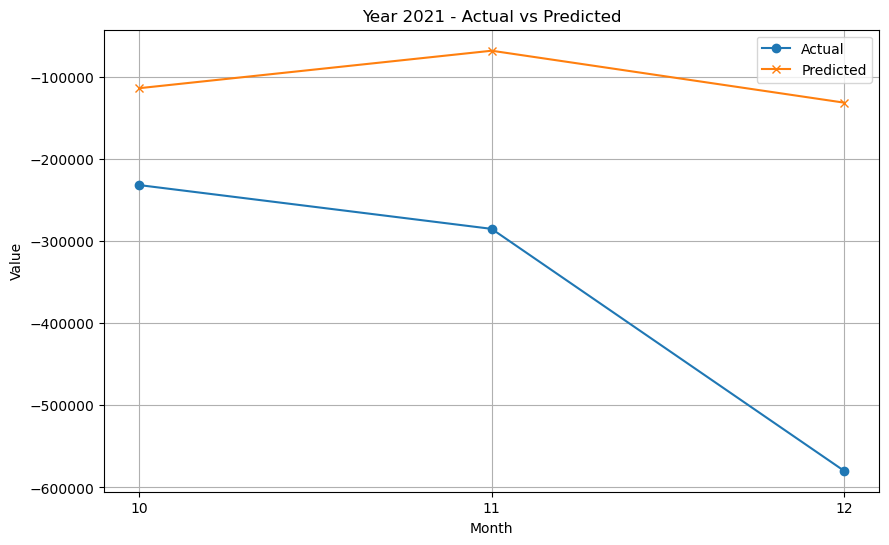

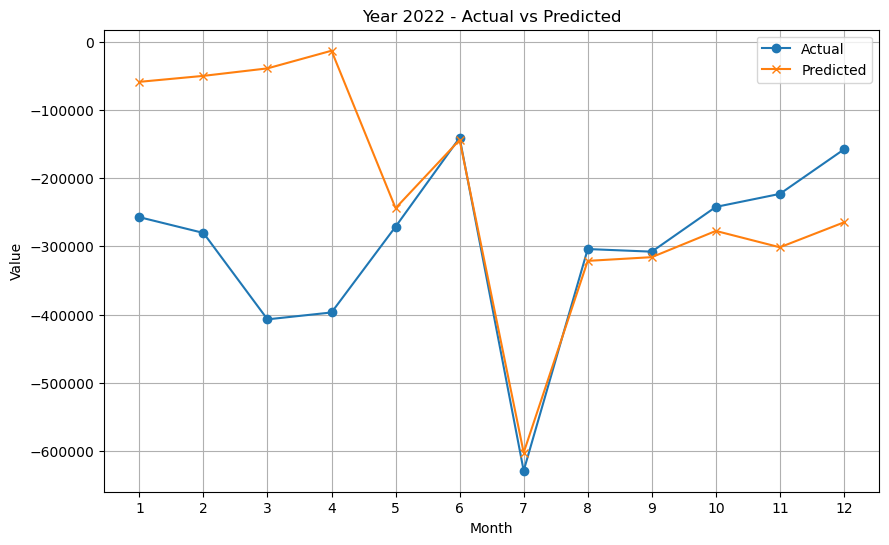

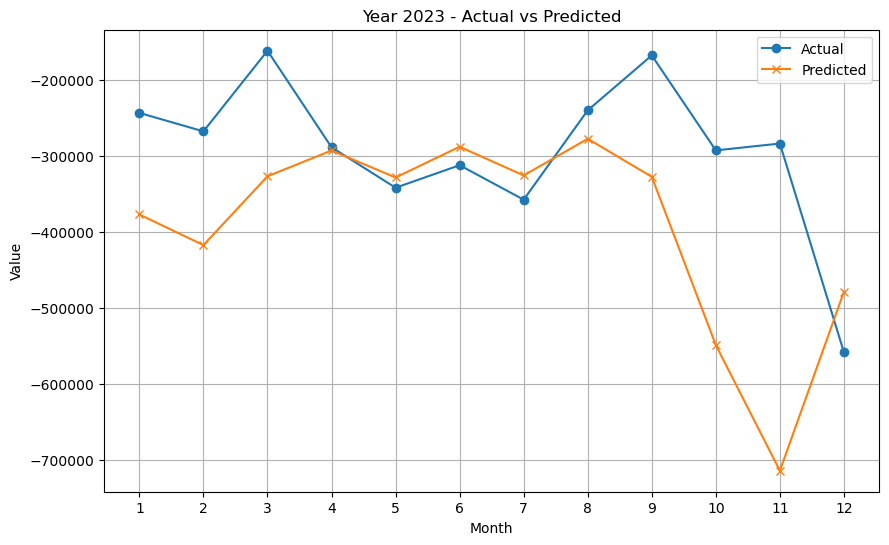

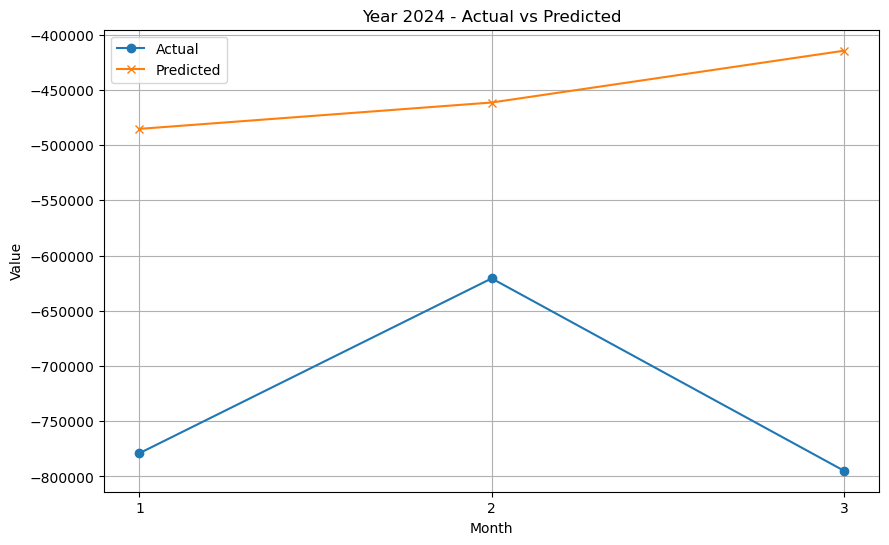

In [49]:
# 실제값과 예측값을 데이터프레임으로 변환
result_df = pd.DataFrame({
    'Year': test_x['year'],
    'Month': test_x['month'],
    'Actual': test_y,
    'Predicted': y_pred.flatten()
})

# 연도별 예측 결과 시각화
unique_years = result_df['Year'].unique()

for year in unique_years:
    year_data = result_df[result_df['Year'] == year]
    
    plt.figure(figsize=(10, 6))
    plt.plot(year_data['Month'], year_data['Actual'], marker='o', label='Actual')
    plt.plot(year_data['Month'], year_data['Predicted'], marker='x', label='Predicted')
    plt.title(f'Year {year} - Actual vs Predicted')
    plt.xlabel('Month')
    plt.ylabel('Value')
    plt.xticks(year_data['Month'])
    plt.legend()
    plt.grid(True)
    plt.show()

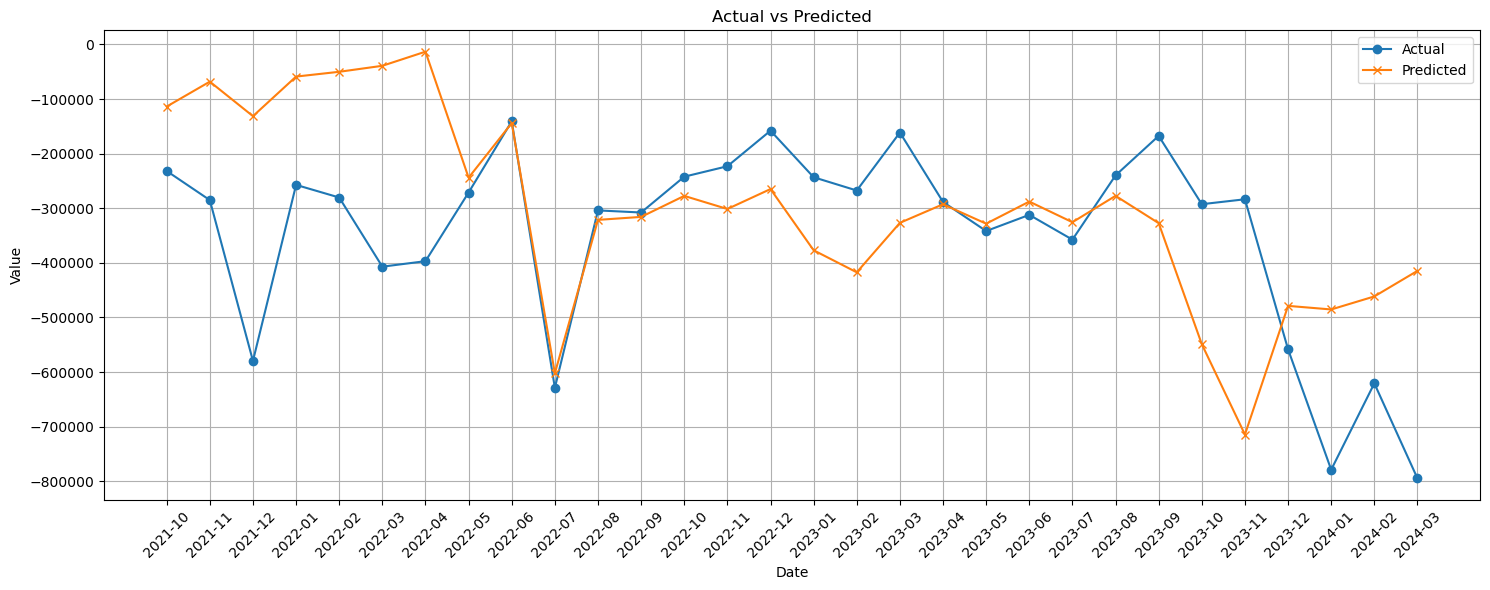

In [53]:
# 실제값과 예측값을 데이터프레임으로 변환
result_df = pd.DataFrame({
    'Year': test_x['year'],
    'Month': test_x['month'],
    'Actual': test_y,
    'Predicted': y_pred.flatten()
})

# 연도와 월을 결합하여 새로운 'Date' 칼럼 생성
result_df['Date'] = result_df['Year'].astype(str) + '-' + result_df['Month'].astype(str).str.zfill(2)

# 날짜 순으로 정렬
result_df = result_df.sort_values('Date')

# 시각화
plt.figure(figsize=(15, 6))
plt.plot(result_df['Date'], result_df['Actual'], marker='o', label='Actual')
plt.plot(result_df['Date'], result_df['Predicted'], marker='x', label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

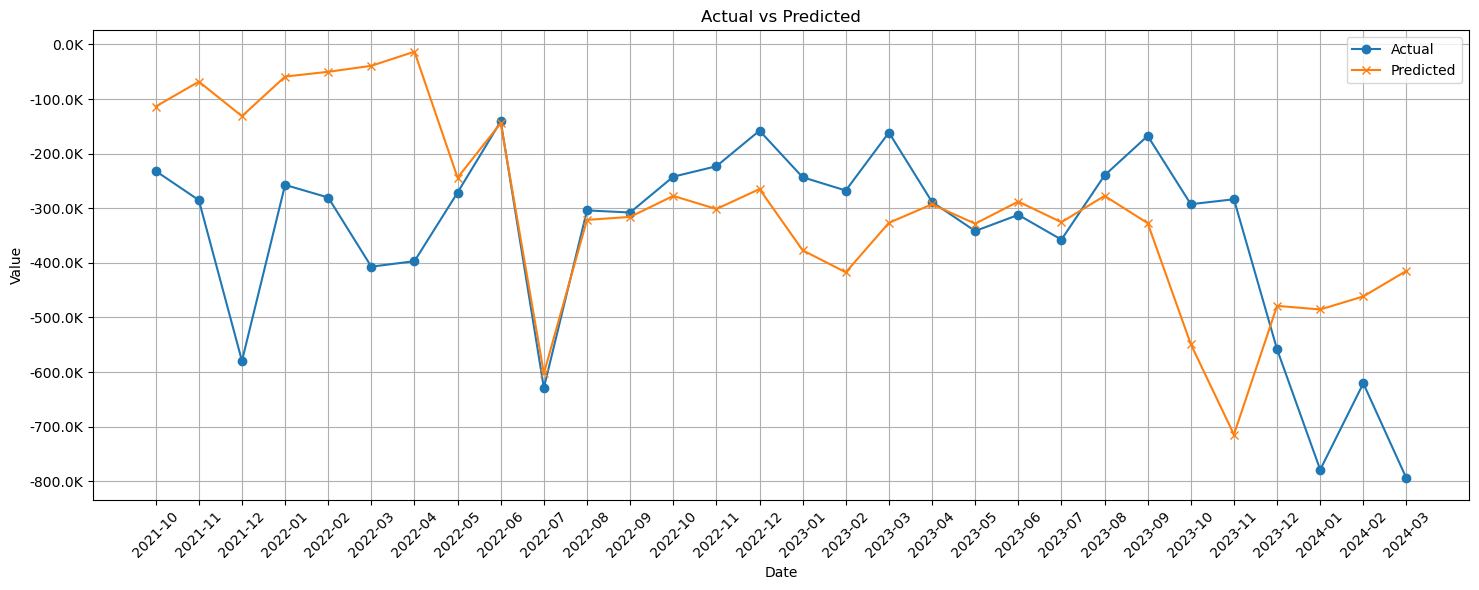

In [54]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
# 실제값과 예측값을 데이터프레임으로 변환
result_df = pd.DataFrame({
    'Year': test_x['year'],
    'Month': test_x['month'],
    'Actual': test_y,
    'Predicted': y_pred.flatten()
})

# 연도와 월을 결합하여 새로운 'Date' 칼럼 생성
result_df['Date'] = result_df['Year'].astype(str) + '-' + result_df['Month'].astype(str).str.zfill(2)

# 날짜 순으로 정렬
result_df = result_df.sort_values('Date')

# 시각화
plt.figure(figsize=(15, 6))
plt.plot(result_df['Date'], result_df['Actual'], marker='o', label='Actual')
plt.plot(result_df['Date'], result_df['Predicted'], marker='x', label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1000}K'))
plt.show()

c:\Users\USER\anaconda3\envs\GPU_1st\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


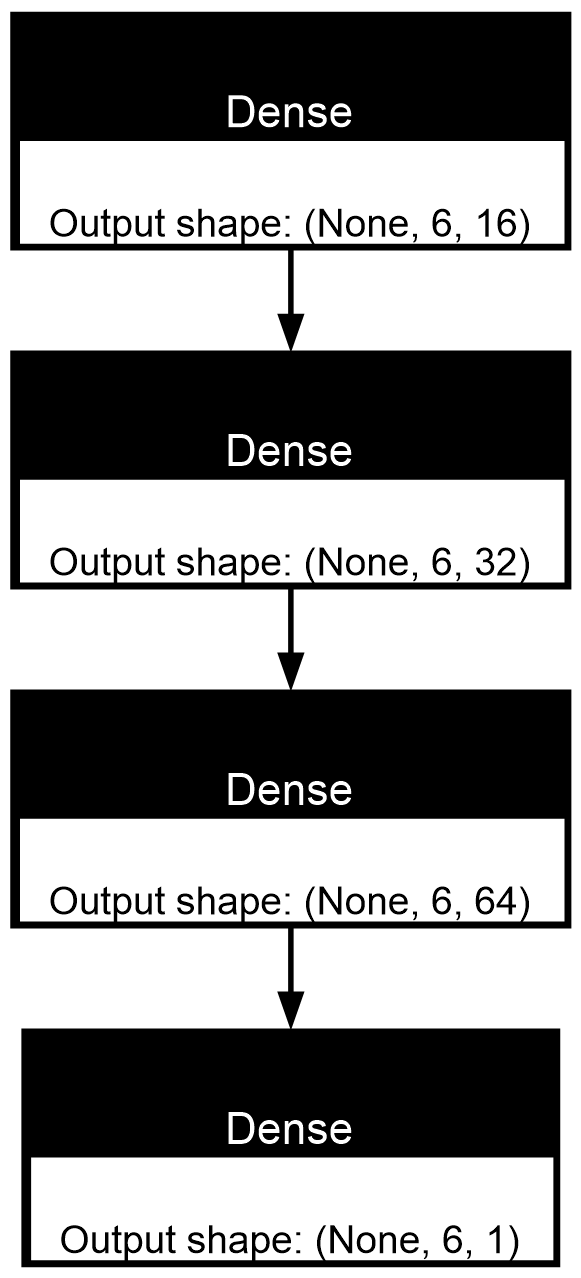

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.9582 - val_loss: 1.3439
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.8221 - val_loss: 1.8223
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.8085 - val_loss: 1.9783
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7391 - val_loss: 2.1968
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.7450 - val_loss: 2.2880
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.7525 - val_loss: 2.1316
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6359 - val_loss: 2.0577
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6900 - val_loss: 2.0371
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6202 - val_loss: 1.9439
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6881 - val_loss: 1.7737
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6951 - val_loss: 1.5816
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6622 - val_loss: 1.4391
E

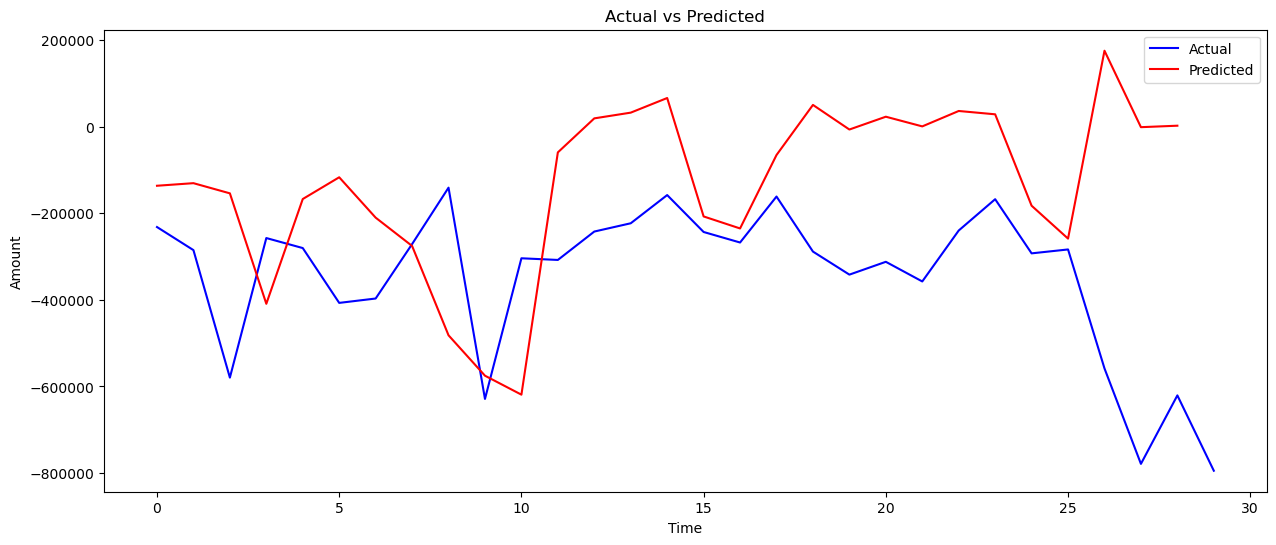

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터 준비
data_df = pd.read_csv('train_data\preprocessed_data_02.CSV')

target = 'amount'
x = data_df.drop(target, axis=1)
y = data_df[target]

# 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=False)

# 데이터 스케일링
scaler_x = StandardScaler().fit(x_train)
scaler_y = StandardScaler().fit(np.array(y_train).reshape(-1, 1))

x_train_scaled = scaler_x.transform(x_train)
x_test_scaled = scaler_x.transform(x_test)
y_train_scaled = scaler_y.transform(np.array(y_train).reshape(-1, 1))
y_test_scaled = scaler_y.transform(np.array(y_test).reshape(-1, 1))

# 시계열 데이터 형태로 변환
def create_dataset(x, y, time_steps=1):
    x_data, y_data = [], []
    for i in range(len(x) - time_steps):
        v = x[i:(i + time_steps)]
        x_data.append(v)
        y_data.append(y[i + time_steps])
    return np.array(x_data), np.array(y_data)

time_steps = 1
x_train_series, y_train_series = create_dataset(x_train_scaled, y_train_scaled, time_steps)
x_test_series, y_test_series = create_dataset(x_test_scaled, y_test_scaled, time_steps)

# tf.keras.backend.clear_session()
tf.compat.v1.reset_default_graph()
# 모델 구성
modelLSTM = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(x_train_scaled.shape[1],x_train_series.shape[2])),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(1)
])

modelLSTM.compile(optimizer='adam', loss='mae')
display(plot_model(modelLSTM, show_shapes=True))
# 모델 훈련
historyLSTM = modelLSTM.fit(x_train_series, y_train_series, epochs=30, batch_size=32, validation_data=(x_test_series, y_test_series))

# 예측
y_pred_scaled = modelLSTM.predict(x_test_series)
# y_pred_scaled의 차원 확인 및 조정
if len(y_pred_scaled.shape) > 2:
    y_pred_scaled = np.squeeze(y_pred_scaled, axis=(1,))

# 예측 결과 역 스케일링
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# 결과 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.title('Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.legend()
plt.show()